In [2]:
from src.datasets import get_mnist_dataloaders
from diffusers import DDPMPipeline, DDPMScheduler

/v/raid1b/backup/hhisham/anaconda-destination/anaconda3/envs/PDL_HW2/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from matplotlib import pyplot as plt

In [24]:
train_loader, test_loader = get_mnist_dataloaders(batch_size=32, image_size=512)

In [25]:
for images, labels in train_loader:
    img1 = images[0]
    label = labels[0]
    break

In [26]:
img1.shape

torch.Size([1, 512, 512])

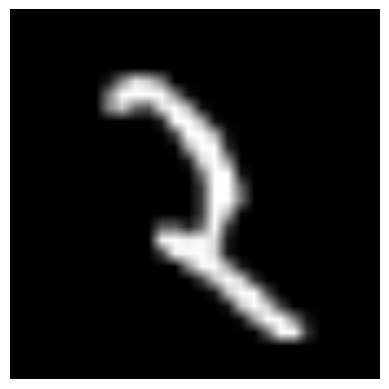

Label: 2


In [27]:
# view the image
plt.imshow(img1[0], cmap="gray")
plt.axis("off")
plt.show()

print(f"Label: {label.item()}")

In [93]:
from src.models import create_model

In [14]:
config = {
        "image_size": 28,
        "in_channels": 1,  # Grayscale images
        "out_channels": 1,
        "layers_per_block": 2,
        "block_out_channels": (64, 128, 256, 512),  # Number of channels in each block
        "down_block_types": (
            "DownBlock2D",
            "DownBlock2D",
            "DownBlock2D",
            "DownBlock2D",
        ),
        "up_block_types": ("UpBlock2D", "UpBlock2D", "UpBlock2D", "UpBlock2D"),
    }

In [52]:
model = create_model(config)
model.to("cuda")
model.train()

UNet2DModel(
  (conv_in): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=64, out_features=256, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=256, out_features=256, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 64, eps=1e-05, affine=True)
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=256, out_features=64, bias=True)
          (norm2): GroupNorm(32, 64, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Conv2d(64, 64, ker

In [25]:
# model parameters
model_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of trainable parameters: {model_parameters / 1e6:.2f}M")

Number of trainable parameters: 56.57M


In [94]:
# only give a forward pass of a single image
model(img1.unsqueeze(0).to("cuda"), 0)  # add batch dimension and move to GPU

UNet2DOutput(sample=tensor([[[[-0.1974, -0.2140, -0.2360,  ..., -0.1199,  0.0128,  0.0842],
          [-0.0435, -0.1594, -0.0075,  ...,  0.1585,  0.1601,  0.2703],
          [-0.3725, -0.4487, -0.2820,  ..., -0.0426,  0.1880,  0.0964],
          ...,
          [-0.2541, -0.4202, -0.2404,  ..., -0.0997,  0.0314,  0.0375],
          [-0.2301, -0.2989, -0.0522,  ...,  0.0200,  0.1038,  0.1291],
          [-0.2162, -0.2080,  0.0993,  ...,  0.0957,  0.1724, -0.0088]]]],
       device='cuda:0', grad_fn=<ConvolutionBackward0>))